In [120]:
import warnings
warnings.filterwarnings('ignore')

The warnings are a little annoying ...

### This is a short example of digit recognition with random forest 

In [121]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import cv2

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [90]:
digits.images[1].shape

(8, 8)

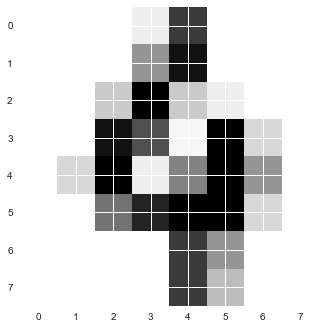

In [15]:
plt.imshow(digits.images[100])

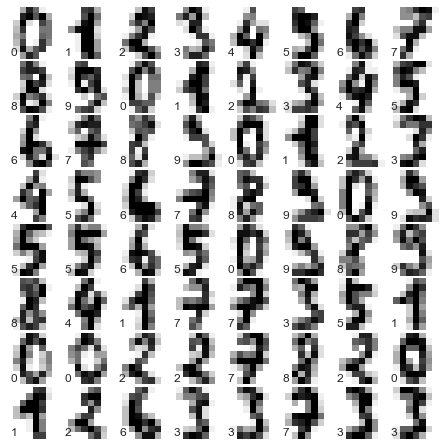

In [9]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [93]:
Xtest[1]

array([ 0.,  1., 15., 14.,  2.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,
        3.,  2.,  0.,  0.,  2., 16.,  3.,  2., 13.,  3.,  0.,  0.,  0.,
       11., 14., 15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  0.,  0.,
        0.,  0.,  0., 15., 13., 14.,  0.,  0.,  0.,  0.,  2., 15.,  4.,
       16.,  3.,  0.,  0.,  0.,  1., 15., 16., 12.,  1.,  0.,  0.])

In [18]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [19]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.96      0.98        45
          2       0.95      1.00      0.98        42
          3       0.98      1.00      0.99        44
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.96      0.98      0.97        47
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



confusion matrice 

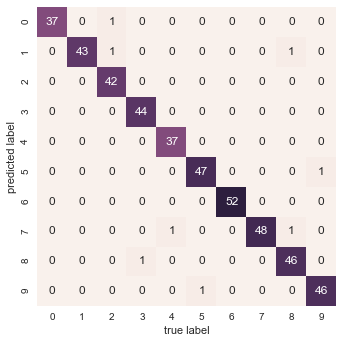

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

I have drew a number with paint 

In [138]:
test_image = cv2.imread('Paint_image/8_2.png')

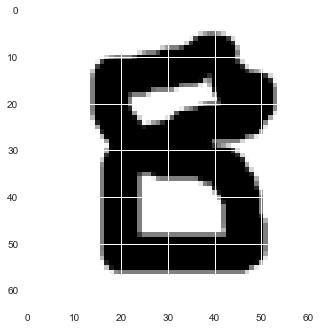

In [139]:
plt.imshow(test_image)

In [140]:
test_image.shape

(64, 64, 3)

In [141]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

In [142]:
test_image.shape

(64, 64)

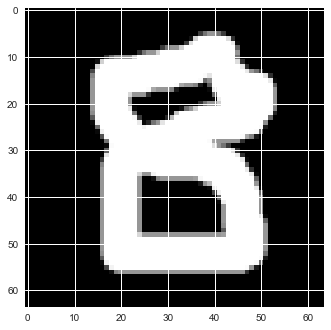

In [143]:
plt.imshow(test_image)

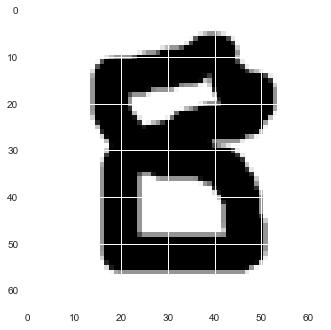

In [144]:
test_image=255-test_image
plt.imshow(test_image)

In [145]:
resized_test_image = cv2.resize(test_image, (8, 8)) 

In [146]:
resized_test_image.shape

(8, 8)

Warning : We are still encoded in 3 colours 

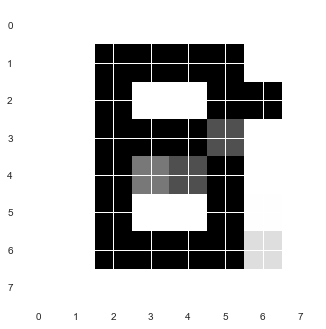

In [147]:
plt.imshow(resized_test_image)

In [148]:
resized_test_image

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255, 255,   0,   0],
       [  0,   0, 255,   0,   0, 255, 255,   0],
       [  0,   0, 255, 255, 255, 192,   0,   0],
       [  0,   0, 255, 154, 193, 255,   0,   0],
       [  0,   0, 255,   0,   0, 255,   2,   0],
       [  0,   0, 255, 255, 255, 255,  56,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [149]:
y=np.ndarray.flatten(resized_test_image)

In [150]:
print("Notre modèle prédit :") ; model.predict(y)[0]

Notre modèle prédit :


8

Qu'est ce qui se passe si on fait n'imp ? 

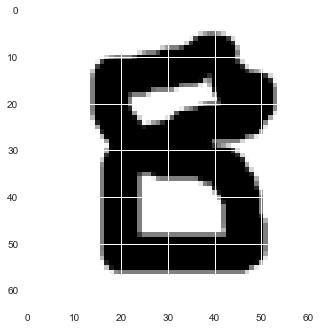

In [151]:
test_image2 = cv2.imread('Paint_image/8_2.png')
plt.imshow(test_image2)

In [153]:
test_image2 = cv2.cvtColor(test_image2, cv2.COLOR_RGB2GRAY)
test_image2=255-test_image2
resized_test_image2 = np.ndarray.flatten(cv2.resize(test_image2, (8, 8))) 

In [ ]:
print("Notre modèle prédit :") ; model.predict(resized_test_image2